In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.test.is_gpu_available():
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

No GPU was detected. CNNs can be very slow without a GPU.


In [2]:
tf.test.is_gpu_available()

False

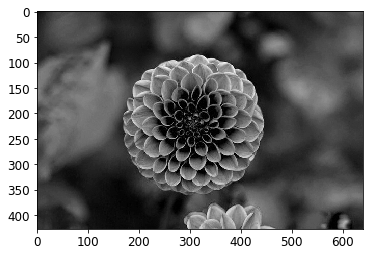

In [3]:
import numpy as np
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg')/255
flower = load_sample_image("flower.jpg")/255

images = np.array([china, flower])

plt.imshow(images[1, :, :, 2], cmap="gray")

batch_size, height, width, channels = images.shape

In [15]:
images.shape

(2, 427, 640, 3)

In [18]:
images[:, 0, 0, :]

array([[0.68235294, 0.78823529, 0.90588235],
       [0.00784314, 0.0745098 , 0.05098039]])

In [19]:
filters = np.zeros((7,7, channels, batch_size), dtype = np.float32)
filters[:, 3, :, :] = 1
filters[3, :, :, :] = 1

In [20]:
filters[:, :, 0, 0]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [21]:
output = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

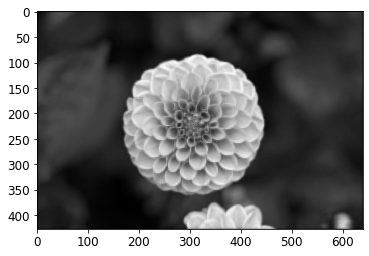

In [24]:
plt.imshow(output[1, :, :, 0], cmap="gray")

In [10]:
merged_images = np.expand_dims(np.append(china, flower, 2), axis=0)
# print(np.expand_dims(merged_images, axis=0).shape)
merged_output = tf.nn.conv2d(merged_images, filters, strides=1, padding="SAME")

UnimplementedError: The Conv2D op currently does not support grouped convolutions on the CPU. A grouped convolution was attempted to be run because the input depth of 6 does not match the filter input depth of 3 [Op:Conv2D]

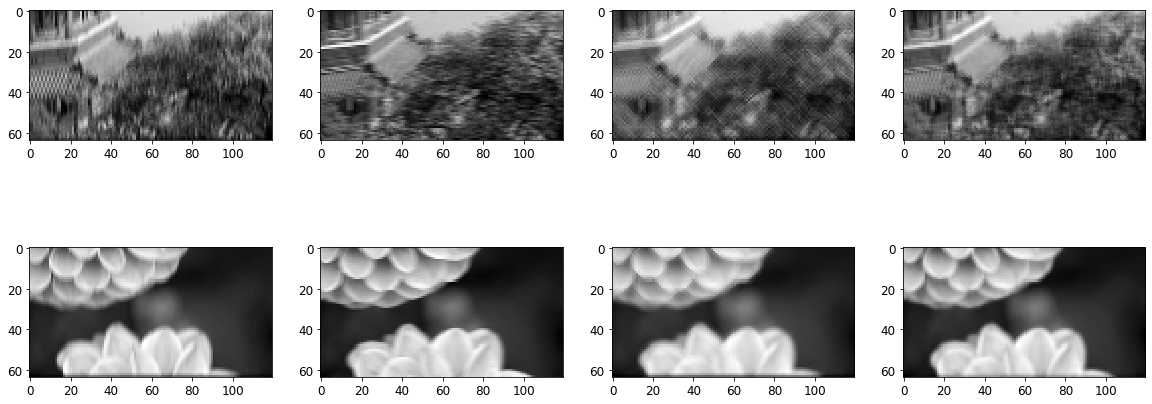

In [26]:
filters = np.zeros((7,7, channels, 4), dtype = np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1
for idx in range(0, filters.shape[0]):
    filters[idx, idx, :, 2] = 1
    filters[idx, 6-idx, :, 2] = 1
filters[:, 3, :, 3] = 1
filters[3, :, :, 3] = 1

output = tf.nn.conv2d(images, filters, strides=2, padding="SAME")

number_of_feature_maps = output.shape[3]
number_of_images = output.shape[0]

plt.figure(figsize=[20, 8])

image_order = 1
for image in range(0, number_of_images):
    for fm in range(0, number_of_feature_maps):
        plt.subplot(number_of_images, number_of_feature_maps, image_order)
        image_order += 1
        plt.imshow(output[image, 150:220, 130:250, fm], cmap="gray")

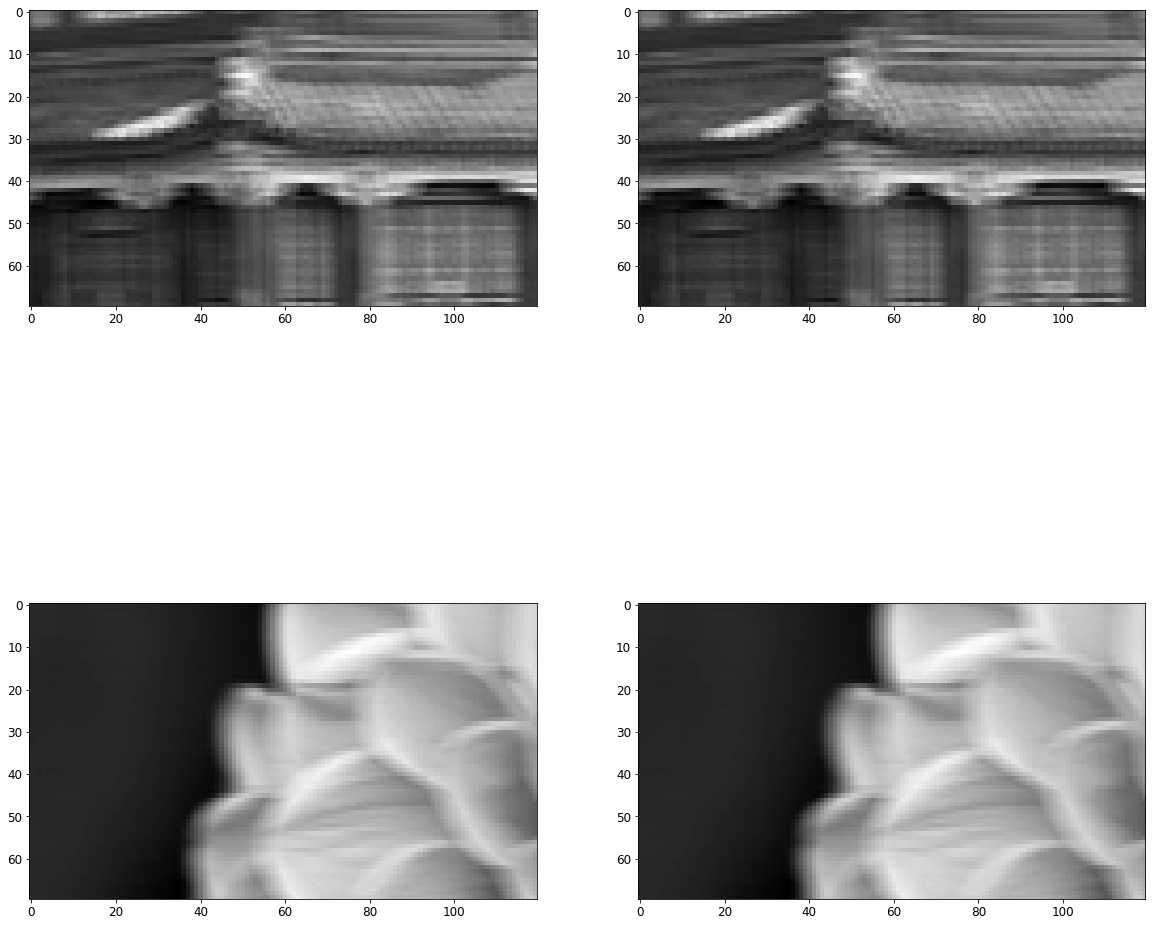

In [167]:
filters = np.zeros((7,7, channels, 4), dtype = np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1
for idx in range(0, filters.shape[0]):
    filters[idx, idx, :, 2] = 1
    filters[idx, 6-idx, :, 2] = 1
filters[:, 3, :, 3] = 1
filters[3, :, :, 3] = 1

output = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

number_of_feature_maps = output.shape[3]
number_of_images = output.shape[0]

plt.figure(figsize=[20, 20])

image_order = 1
for image in range(0, number_of_images):
    for fm in range(0, number_of_feature_maps):
        plt.subplot(number_of_images, number_of_feature_maps, image_order)
        image_order += 1
        plt.imshow(output[image, 150:220, 130:250, fm], cmap="gray")

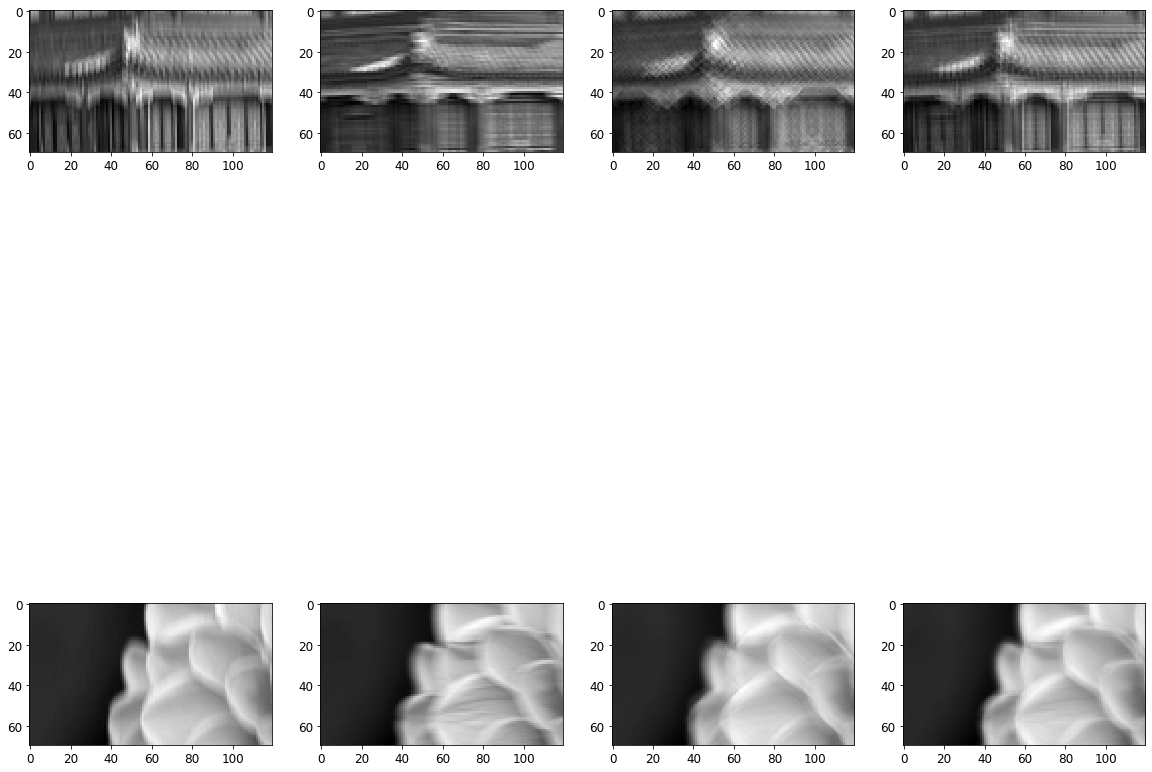

In [190]:
filters = np.zeros((7,7, channels, 4), dtype = np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1
for idx in range(0, filters.shape[0]):
    filters[idx, idx, :, 2] = 1
    filters[idx, 6-idx, :, 2] = 1
filters[:, 3, :, 3] = 1
filters[3, :, :, 3] = 1

output = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

number_of_feature_maps = output.shape[3]
number_of_images = output.shape[0]

plt.figure(figsize=[20, 20])

image_order = 1
for image in range(0, number_of_images):
    for fm in range(0, number_of_feature_maps):
        plt.subplot(number_of_images, number_of_feature_maps, image_order)
        image_order += 1
        plt.imshow(output[image, 150:220, 130:250, fm], cmap="gray")

In [175]:
output.shape

TensorShape([2, 427, 640, 4])

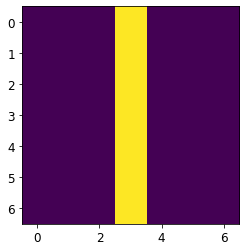

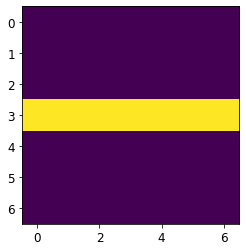

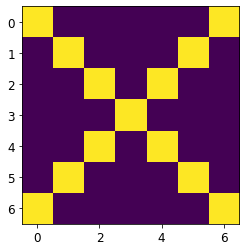

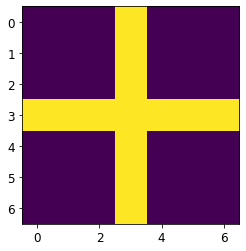

In [191]:
plt.imshow(filters[:, :, 0, 0])
plt.show()
plt.imshow(filters[:, :, 0, 1])
plt.show()
plt.imshow(filters[:, :, 0, 2])
plt.show()
plt.imshow(filters[:, :, 0, 3])
plt.show()

In [204]:
def feature_map_size(input_size, kernel_size, strides=1, padding="SAME"):
    if padding == "SAME":
        return (input_size - 1) // strides + 1
    else:
        return (input_size - kernel_size) // strides + 1
    

def pad_before_and_padded_size(input_size, kernel_size, strides=1):
    fmap_size = feature_map_size(input_size, kernel_size, strides)
    padded_size = max((fmap_size - 1) * strides + kernel_size, input_size)
    pad_before = (padded_size - input_size) // 2
    return pad_before, padded_size

def manual_same_padding(images, kernel_size, strides=1):
    if kernel_size == 1:
        return images.astype(np.float32)
    batch_size, height, width, channels = images.shape
    top_pad, padded_height = pad_before_and_padded_size(height, kernel_size, strides)
    left_pad, padded_width  = pad_before_and_padded_size(width, kernel_size, strides)
    padded_shape = [batch_size, padded_height, padded_width, channels]
    padded_images = np.zeros(padded_shape, dtype=np.float32)
    padded_images[:, top_pad:height+top_pad, left_pad:width+left_pad, :] = images
    return padded_images

AttributeError: module 'numpy' has no attribute 'close'

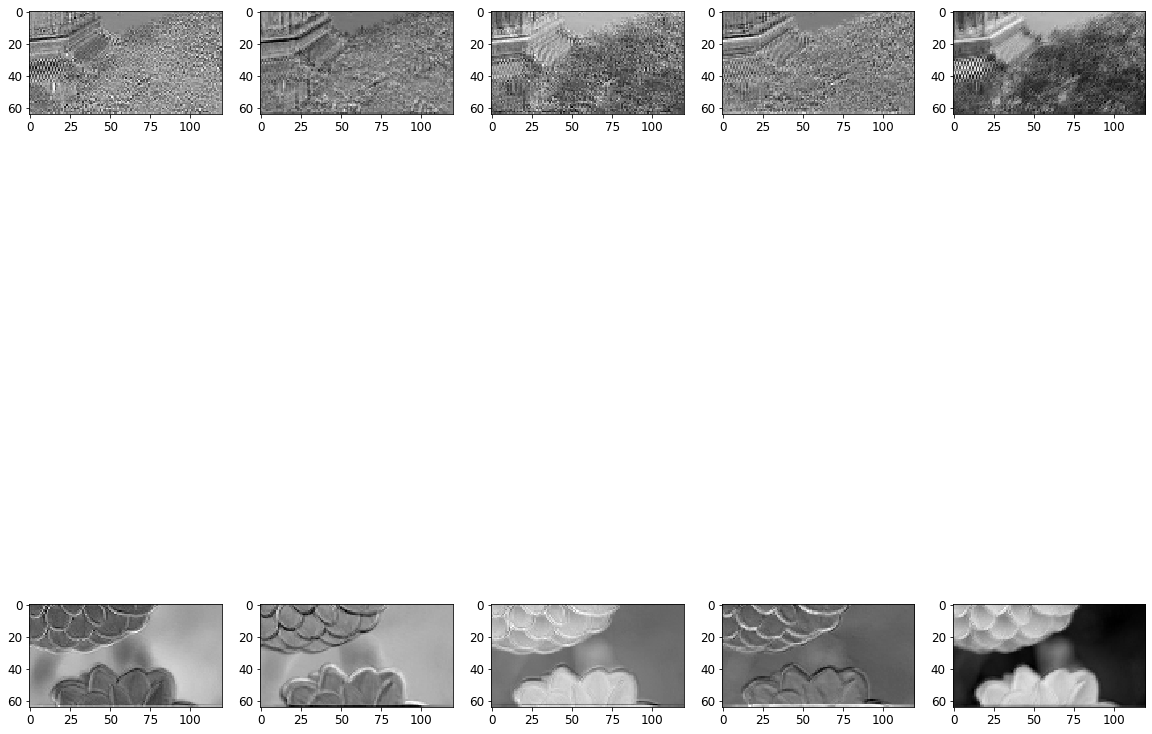

In [234]:
number_of_feature_maps = 5
number_of_images = images.shape[0]

conv_valid = keras.layers.Conv2D(filters = number_of_feature_maps, kernel_size = kernel_size, strides = stride, padding="VALID")
valid_output = conv_valid(manual_same_padding(images, kernel_size, stride))

plt.figure(figsize=[20, 20])

image_order = 1
for image in range(0, number_of_images):
    for fm in range(0, number_of_feature_maps):
        plt.subplot(number_of_images, number_of_feature_maps, image_order)
        image_order += 1
        plt.imshow(valid_output[image, 150:220, 130:250, fm], cmap="gray")
        
assert np.allclose(valid_output.numpy())


In [227]:
valid_output.shape

TensorShape([2, 214, 320, 4])

W1118 19:35:30.984987 16624 base_layer.py:1772] Layer conv2d_29 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



TypeError: allclose() missing 1 required positional argument: 'b'

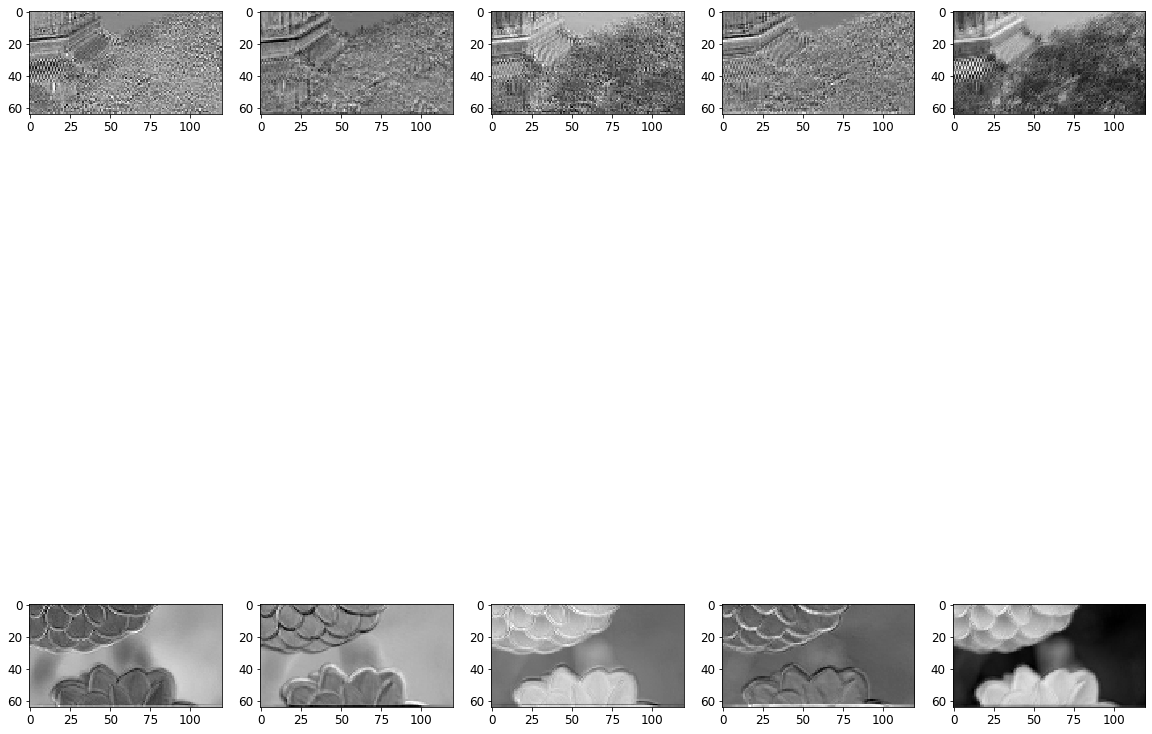

In [238]:
kernel_size = 7
stride = 2

conv_same = keras.layers.Conv2D(filters = 5, kernel_size = kernel_size, strides = stride, padding="SAME")
conv_same.build(tf.TensorShape(images.shape))
conv_same.set_weights(conv_valid.get_weights())

same_output = conv_same(images)

plt.figure(figsize=[20, 20])

image_order = 1
for image in range(0, number_of_images):
    for fm in range(0, number_of_feature_maps):
        plt.subplot(number_of_images, number_of_feature_maps, image_order)
        image_order += 1
        plt.imshow(valid_output[image, 150:220, 130:250, fm], cmap="gray")
        
assert np.allclose(valid_output.numpy())

W1119 18:39:11.427661 25120 base_layer.py:1772] Layer max_pooling2d_17 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

W1119 18:39:11.440622 25120 base_layer.py:1772] Layer average_pooling2d_12 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults t

TypeError: Invalid shape (3,) for image data

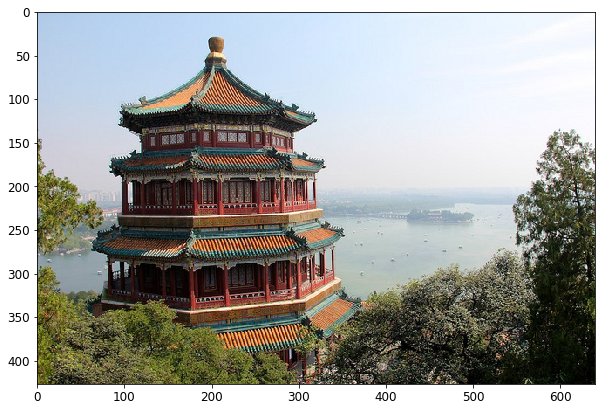

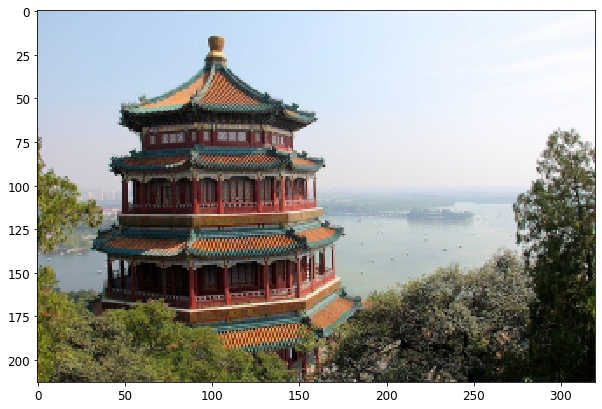

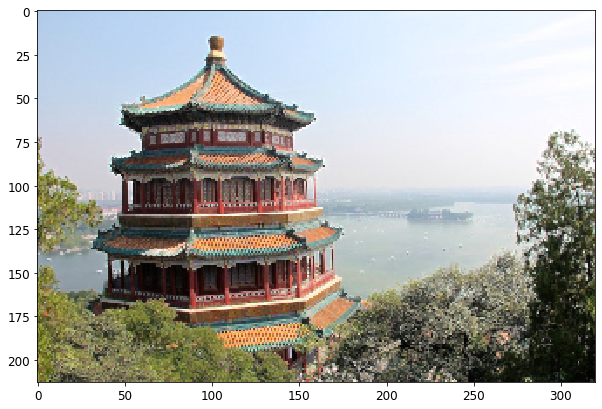

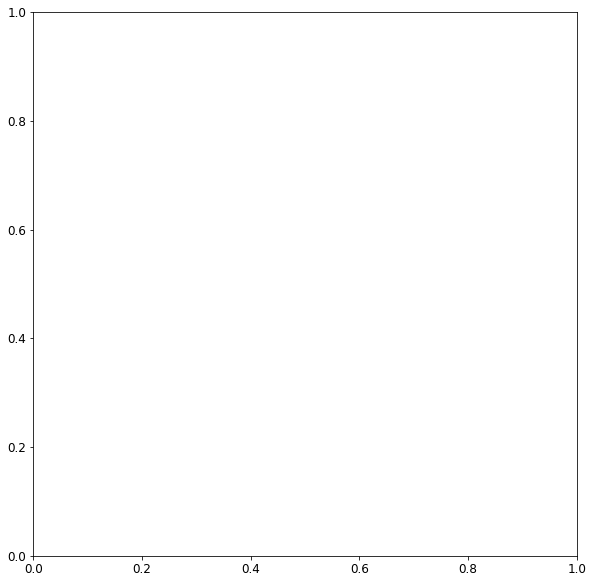

In [27]:
max_pool = keras.layers.MaxPool2D(pool_size = 2)
max_pooled_images = max_pool(images)

avg_pool = keras.layers.AvgPool2D(pool_size=2)
avg_pooled_images = avg_pool(images)

gl_avg_pool = keras.layers.GlobalAvgPool2D()
gl_avg_pooled_images = gl_avg_pool(images)
# gl_avg_pooled_images_2 = gl_avg_pool(gl_avg_pooled_images)



plt.figure(figsize=[10,10])
plt.imshow(images[0])

plt.figure(figsize=[10,10])
plt.imshow(avg_pooled_images[0])

plt.figure(figsize=[10,10])
plt.imshow(max_pooled_images[0])

plt.figure(figsize=[10,10])
plt.imshow(gl_avg_pooled_images[0])




In [13]:
images.shape

(2, 427, 640, 3)

In [14]:
max_pooled_images.shape

TensorShape([2, 213, 320, 3])

In [28]:
gl_avg_pooled_images.shape

TensorShape([2, 3])

In [29]:
gl_avg_pooled_images

<tf.Tensor: id=182, shape=(2, 3), dtype=float32, numpy=
array([[0.56767327, 0.57063633, 0.5528319 ],
       [0.21627817, 0.28856742, 0.2232219 ]], dtype=float32)>

---------- MNIST w/ CNN

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean  = X_train.mean(axis=0, keepdims=True)
X_std   = X_train.std(axis=0, keepdims = True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test  = (X_test  - X_mean) / X_std



In [5]:
X_train[..., np.newaxis].shape

(55000, 28, 28, 1)

In [6]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test  = X_test [..., np.newaxis]


In [7]:
X_train.shape

(55000, 28, 28, 1)

In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size = 7, activation = "relu", padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(filters=128, kernel_size = 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(filters=256, kernel_size = 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=[X_valid, y_valid])
score = model.evaluate(X_test, y_test)
X_new=X_test[:10]
y_pred = model.predict(X_new)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 178s 3ms/sample - loss: 0.6737 - accuracy: 0.7646 - val_loss: 0.3584 - val_accuracy: 0.8728
Epoch 2/10
55000/55000 [==============================] - 172s 3ms/sample - loss: 0.4047 - accuracy: 0.8643 - val_loss: 0.3348 - val_accuracy: 0.8802
Epoch 3/10
55000/55000 [==============================] - 4010s 73ms/sample - loss: 0.3498 - accuracy: 0.8829 - val_loss: 0.2910 - val_accuracy: 0.8958
Epoch 4/10
55000/55000 [==============================] - 398s 7ms/sample - loss: 0.3185 - accuracy: 0.8935 - val_loss: 0.2748 - val_accuracy: 0.8978
Epoch 5/10
55000/55000 [==============================] - 382s 7ms/sample - loss: 0.2923 - accuracy: 0.9022 - val_loss: 0.2714 - val_accuracy: 0.9012
Epoch 6/10
55000/55000 [==============================] - 355s 6ms/sample - loss: 0.2802 - accuracy: 0.9050 - val_loss: 0.2856 - val_accuracy: 0.8992
Epoch 7/10
55000/55000 [=========================

In [73]:
y_pred.argmax(axis=1)

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

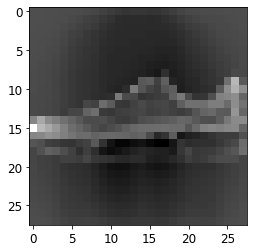

In [87]:
plt.imshow(X_new[9, :, :, 0], cmap="gray")

In [21]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size = 7, activation = "relu", padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(filters=128, kernel_size = 3, activation="relu", padding="same"),
    keras.layers.Conv2D(filters=128, kernel_size = 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(filters=256, kernel_size = 3, activation="relu", padding="same"),
    keras.layers.Conv2D(filters=256, kernel_size = 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 256)        

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=[X_valid, y_valid])
score = model.evaluate(X_test, y_test)
X_new=X_test[:10]
y_pred = model.predict(X_new)



In [113]:
X_train.shape

(55000, 28, 28, 1)

--- ResNet 34

In [46]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            keras.layers.Conv2D(filters, kernel_size = 3, strides = strides, padding = "SAME", use_bias = False),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, kernel_size = 3, strides = 1, padding = "SAME", use_bias = False),
            keras.layers.BatchNormalization(),
        ]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv2D(filters, kernel_size = 1, strides = strides, padding = "SAME", use_bias = False),
                keras.layers.BatchNormalization(),
            ]
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return Z + skip_Z


In [50]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=7, strides=2, padding="SAME", input_shape=[28, 28, 1]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))

prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides = strides))
    prev_filters = filters

model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_184 (Conv2D)          (None, 14, 14, 64)        3200      
_________________________________________________________________
batch_normalization_170 (Bat (None, 14, 14, 64)        256       
_________________________________________________________________
activation_14 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
residual_unit_72 (ResidualUn (None, 7, 7, 64)          74240     
_________________________________________________________________
residual_unit_73 (ResidualUn (None, 7, 7, 64)          74240     
_________________________________________________________________
residual_unit_74 (ResidualUn (None, 7, 7, 64)        

In [51]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=[X_valid, y_valid])
score = model.evaluate(X_test, y_test)
print("model score is ", score)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3428s 62ms/sample - loss: 0.5523 - accuracy: 0.8276 - val_loss: 0.3947 - val_accuracy: 0.8580
Epoch 2/10
55000/55000 [==============================] - 3427s 62ms/sample - loss: 0.3623 - accuracy: 0.8751 - val_loss: 0.3654 - val_accuracy: 0.8696
Epoch 3/10
55000/55000 [==============================] - 3437s 62ms/sample - loss: 0.3223 - accuracy: 0.8878 - val_loss: 0.3083 - val_accuracy: 0.8916
Epoch 4/10
55000/55000 [==============================] - 3438s 63ms/sample - loss: 0.2879 - accuracy: 0.8968 - val_loss: 0.4059 - val_accuracy: 0.8686
Epoch 5/10
55000/55000 [==============================] - 3453s 63ms/sample - loss: 0.2731 - accuracy: 0.9043 - val_loss: 0.2924 - val_accuracy: 0.9004
Epoch 6/10
55000/55000 [==============================] - 3420s 62ms/sample - loss: 0.2549 - accuracy: 0.9098 - val_loss: 0.2863 - val_accuracy: 0.8908
Epoch 7/10
55000/55000 [===============

model score is  [0.2787912679851055, 0.9052]


In [55]:
images.shape

(2, 427, 640, 3)

In [7]:
tf.reduce_min([640.0,321])

<tf.Tensor: id=37, shape=(), dtype=float32, numpy=321.0>

In [11]:
tf.random.uniform([2, 4])

<tf.Tensor: id=59, shape=(2, 4), dtype=float32, numpy=
array([[0.7413678 , 0.62854624, 0.01738465, 0.3431449 ],
       [0.51063764, 0.3777541 , 0.07321596, 0.02137029]], dtype=float32)>

In [12]:
tf.reduce_max([2,3,4,1])

<tf.Tensor: id=66, shape=(), dtype=int32, numpy=4>

------- Conv2DTranspose

In [16]:
# images_resized = tf.image.resize_with_pad(images, 224, 224, antialias=True)

images_resized = tf.image.resize_with_pad(images, 224, 224)
conv_transpose = keras.layers.Conv2DTranspose(filters=5, kernel_size=3, strides=3, padding="VALID")
images_transposed = conv_transpose(images_resized)

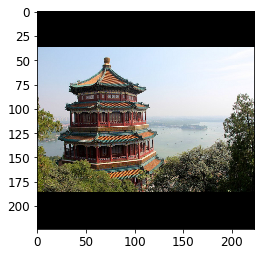

In [17]:
plt.imshow(images_resized[0])

In [18]:
images_resized.shape

TensorShape([2, 224, 224, 3])

In [19]:
images_transposed.shape

TensorShape([2, 672, 672, 5])

W1208 22:25:29.653570 12720 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


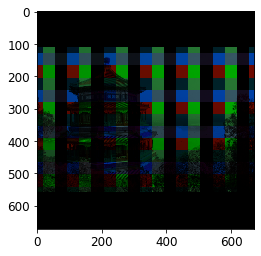

In [26]:
plt.imshow(images_transposed[0, ..., :3])

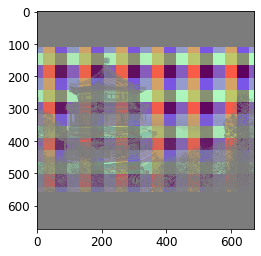

In [23]:
def normalize(X):
    return (X - tf.reduce_min(X)) / (tf.reduce_max(X) - tf.reduce_min(X))

plt.imshow(normalize(images_transposed[0, ..., 1:4]))

In [24]:
print("before normalization: ", images_transposed[0, 200, 20, 0])

print("max:", tf.reduce_max(images_transposed))
print("min:", tf.reduce_min(images_transposed))

print("after normalization: ", normalize(images_transposed)[0, 200, 20, 0])

before normalization:  tf.Tensor(0.1760488, shape=(), dtype=float32)
max: tf.Tensor(0.67156464, shape=(), dtype=float32)
min: tf.Tensor(-0.6441104, shape=(), dtype=float32)
after normalization:  tf.Tensor(0.62337524, shape=(), dtype=float32)


In [31]:
import tensorflow_datasets as tfds

